# Homework 7

In this homework you will work on normalization and correlation. For normalization you will explore feature scaling and z-scoring and visualize their behavior with respect to outliers. For extra credit, you can look at two more robust methods for normalizing. Next you will extend z-scoring to brain maps and visualize z-scored data. In the last exercise you will implement correlation and revisit the qualitative conclusion from last homework as to which voxel reacts to which task.

In [ ]:
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.
from client.api.notebook import Notebook
ok = Notebook('hw7.ok')
_ = ok.auth(inline=True)

In [127]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nibabel
import cortex
from nistats.hemodynamic_models import glover_hrf as create_hrf

**1. Comparing different types of normalization**
In this exercise you will look at the effect of outliers on normalization techniques. You will compare feature scaling and z-scoring, which you learned in class. Additionally you will learn about two other techniques for feature scaling, using *mean absolute deviation* and *median absolute deviation*, which are even more robust than z-scoring.

This is to conclude that z-scoring is a good compromise for us: It is well understood and deals *well enough* with outliers.

**(a)** [0.5pts] We will start by making four random vectors which differ from each other only by one value, which will be a bigger and bigger outlier. Using `np.random.randn`, create a random vector of length `100` and call it `x0`. Then create `x1, x2, x3` by assigning to each of them `x0.copy()` (you need to call `x0.copy` separately for each one to make sure they are different vectors). Now modify the entry with index 50 in `x1, x2, x3` to be 5, 10, and 20 times the maximum of `x0`, respectively. Lastly, collect `x0, x1, x2, x3` in a list called `X`.

In [21]:
x0 = np.random.randn(100)

x1 = x0.copy()
x2 = x0.copy()
x3 = x0.copy()

x1[50] = x0.max() * 5
x2[50] = x0.max() * 10
x3[50] = x0.max() * 20

X = [x0, x1, x2, x3]

**(b)** [0.5pts] In a figure named `fig_1b` of size `20, 5`, make four subplots that are aligned next to each other. In the first one, plot `x0`, in the second, plot `x1`, in the third, plot `x2`, and in the last one, plot `x4`. You can write out all four subplot commands or do a for loop and use the entries of `X`. The latter is recommended.

Observe that the plot function accommodates for the outlier by scaling such that the peak of the outlier becomes visible. This is basically visual feature scaling and already shows how small the actual data vector becomes with respect to the outlier.

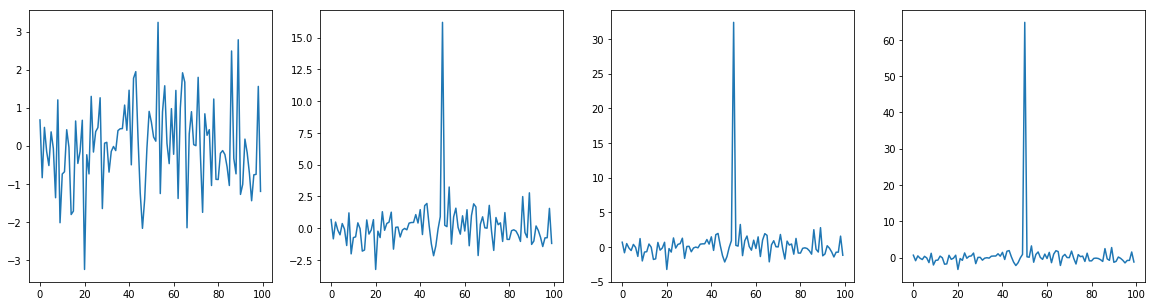

In [71]:
fig1b = plt.figure(figsize=(20, 5))
for i, x in enumerate(X):
    plt.subplot(1, 4, i + 1)
    plt.plot(x)


For all the following plot, we will restrict the y-axis to go from **-5 to 5** in order to be able to see the effects of the scaling.

**(c)** [0.5pts] Implement a function `feature_scaling_simple` like in the lecture, which for an array `x` subtracts its minimum and then divides by the difference between its maximum and minimum.

In [72]:
def feature_scaling_simple(x):
    return (x - x.min()) / (x.max() - x.min())

**(d)** [0.5pts] Make a figure of size `20, 5` which you call `fig_1d`. Compute the feature-scaled versions of `x0, x1, x2, x3` and plot them into four adjacent plots using `plt.subplot`. Use `plt.axis([0, 100, -5, 5])` to make sure that the scale is the same for all the plots.

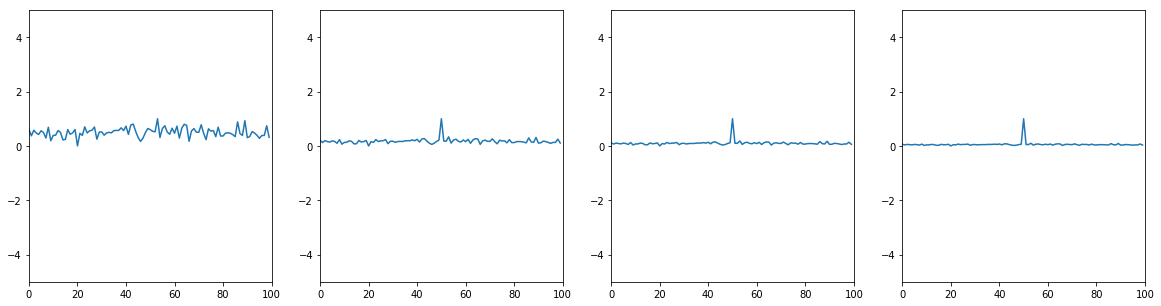

In [80]:
plt.figure(figsize=(20, 5))
for i, x in enumerate(X):
    plt.subplot(1, 4, i + 1)
    plt.plot(feature_scaling_simple(x))
    plt.axis([0, 100, -5, 5])


**(e)** [0.5pts] Implement a function `zscore_simple` which for an array `x` computes the mean and standard deviation, subtracts the mean, divides the result by the standard deviation, and returns this new vector.

In [74]:
def zscore_simple(x):
    return (x - x.mean()) / x.std()

**(f)** [0.5pts] Make a figure of size `20, 5` which you call `fig_1f`. Compute the z-scored versions of `x0, x1, x2, x3` and plot them into four adjacent plots using `plt.subplot`. Use `plt.axis([0, 100, -5, 5])` to make sure that the scale is the same for all the plots.

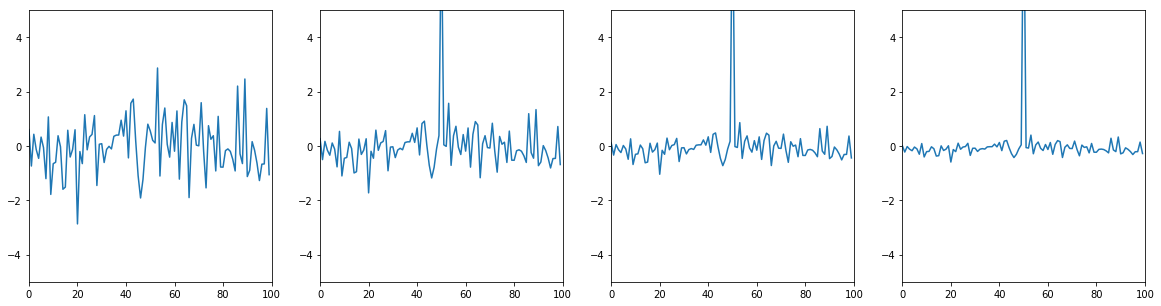

In [81]:
plt.figure(figsize=(20, 5))
for i, x in enumerate(X):
    plt.subplot(1, 4, i + 1)
    plt.plot(zscore_simple(x))
    plt.axis([0, 100, -5, 5])


We observe that the outlier affects the z-scored data less badly than it affects the feature-scaled data.

**(g)** *[0.5 pts extra credit]* In this exercise you will compute a new type of normalization called `mean_absolute_deviation` from the `median`. You will replace subtracting the `mean` by subtracting the `median`, and then average the absolute values of the differences between the vector entries and that median.

Write a function `mean_absolute_deviation_normalization` that takes `x` as an input. In it, compute the median of `x` using `np.median`. Subtract this median from `x` and call the result `x_median_centered`. Then compute the difference of `x` and `x_centered` and take its absolute values using `np.abs`. Store the result in `absolute_deviations`. Compute the `mean_absolute_deviation` by taking the mean of these deviations. Divide `x_median_centered` by `mean_absolute_deviation` and return the result.

Use `mean_absolute_deviation_normalization` on `x0, x1, x2, x3` and plot them exactly as above into a figure named `fig_1g`. 

Observe that the outlier affects this normalization less than both zscoring and feature scaling.

In [82]:
def mean_abosolute_deviation_normalization(x):
    return (x - np.median(x)) / np.abs(x - np.median(x)).mean()

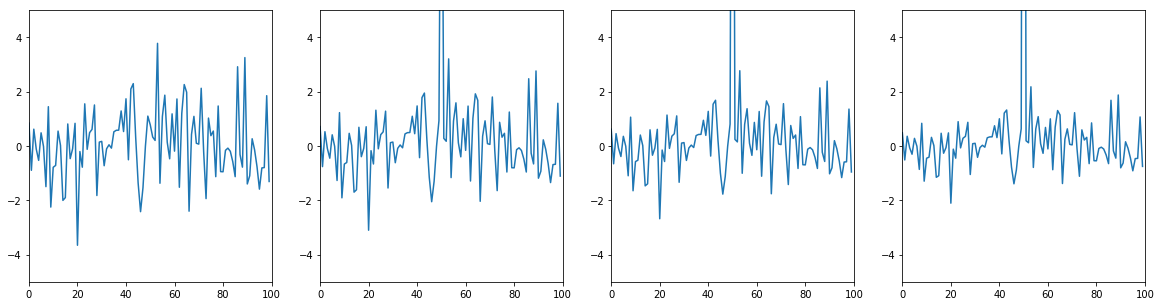

In [83]:
plt.figure(figsize=(20, 5))
for i, x in enumerate(X):
    plt.subplot(1, 4, i + 1)
    plt.plot(mean_abosolute_deviation_normalization(x))
    plt.axis([0, 100, -5, 5])


**(h)** *[0.5pts extra credit]* In this exercise you will compute the *median* absolute deviation from the median, instead of the *mean* absolute deviation. Write a function called `median_absolute_deviation_normalization` in which you perform exactly the same steps as above, except for the deviation part: Instead of `mean_absolute_deviation`, compute `median_absolute_deviation` by taking the `np.median` of the `absolute_deviations`. Then divide `x_median_centered` by `median_absolute_deviation`.

As above, plot the normalized versions of `x0, x1, x2, x3`  into four plots in a figure named `fig_1h`.

Observe here that the resulting scale of the normalization is *always the same*: The normalization procedure didn't care about the outlier at all. This is called *being robust to outliers*.

In [84]:
def median_absolute_deviation_normalization(x):
    return (x - np.median(x)) / np.median(np.abs(x - np.median(x)))

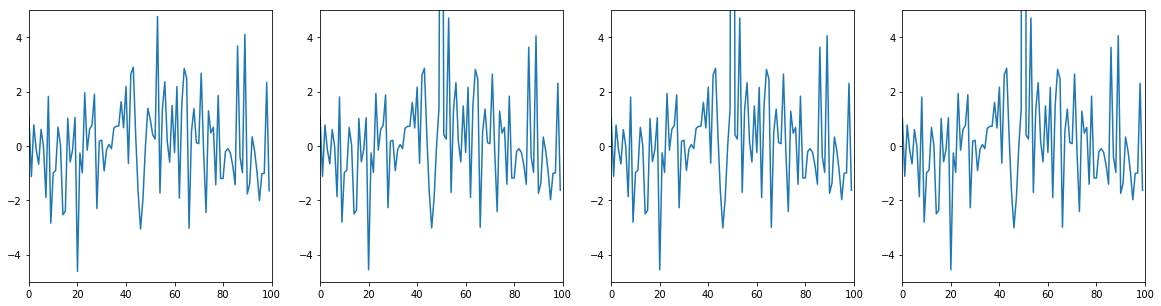

In [85]:
plt.figure(figsize=(20, 5))
for i, x in enumerate(X):
    plt.subplot(1, 4, i + 1)
    plt.plot(median_absolute_deviation_normalization(x))
    plt.axis([0, 100, -5, 5])


**2. Z-scoring fMRI data**

In this exercise you will perform z-scoring on the motor localizer data. You will re-implement z-scoring along the time axis and visualize some z-scored volumes.

**(a)** [0.5pts] For an array of voxel time series, arranged as columns, we would like to be able to z-score them all at once, but independently for each column. We assume that the time axis is always axis 0. Write a function called `zscore_axis0`, which takes an array `X`, and z-scores it along axis 0. Before dividing by the standard deviation, add a tiny value to it (e.g. `0.0000000000001`) to avoid dividing by 0.

In [96]:
def zscore_axis0(X):
    return (X - X.mean(0)) / (X.std(0) + 0.000000000001)

**(b)** [0.5pts] Check your own function as follows: Create a random array `Xtest` of shape `(100, 200)` using `np.random.randn`. Z-score it using your function and call the output `Xtest_zscored_axis0`. Then use `np.allclose` to check whether `np.mean(X_test_zscored_axis0, axis=0)` is 0 everywhere. Store the result in `check1`. Then use `np.allclose` again to check whether `np.std(X_test_zscored_axis0, axis=0)` is 1 everywhere. Store the result in `check2`. Print `check1` and `check2`.

In [97]:
Xtest = np.random.randn(100, 200)
X_test_zscored_axis0 = zscore_axis0(Xtest)
check1 = np.allclose(np.mean(X_test_zscored_axis0, axis=0), 0)
check2 = np.allclose(np.std(X_test_zscored_axis0, axis=0), 1)
print(check1, check2)

True True


**(c)** [0.5pts] Now we are going to make our function `load_file` better by adding z-scoring: Write a function called `load_file(filename, zscore=True, mask=None)` that takes a filename, a boolean indicating whether to `zscore` and optionally a `mask`. Use `nibabel` to load the filename into a name `img`. Extract the data using `get_data` and transpose the result and store it into `data`. If the `mask is not None` (<- please use this exact statement. If you receive warning messages, it is probably because you did something else), then mask the data using `mask`. Then, if `zscore` was specified as `True`, use `zscore_axis0` to zscore the data. Finally, return the result.

In [98]:
def load_file(filename, zscore=True, mask=None):
    
    img = nibabel.load(filename)
    data = img.get_data().T
    if mask is not None:
        data = data[:, mask]
    if zscore:
        data = zscore_axis0(data)
    return data

**(d)** [0.5pts] Use `load_file` to load the file stored in `motor_filename` below into `motor_data`. Extract the first volume and call it `first_volume`. Remember how we plotted volumes as a collection of slices in previous lectures? Plot all the axial slices of this volume arranged in 5 rows of 6 subplots.

**Note:** This will look weird. Z-scoring removes the mean per voxel. This means that you will see the brain much less than if you didn't zscore.

In [99]:
motor_filename = "/data/cogneuro/fMRI/motor/s01_motorloc.nii.gz"

In [100]:
motor_data = load_file(motor_filename)

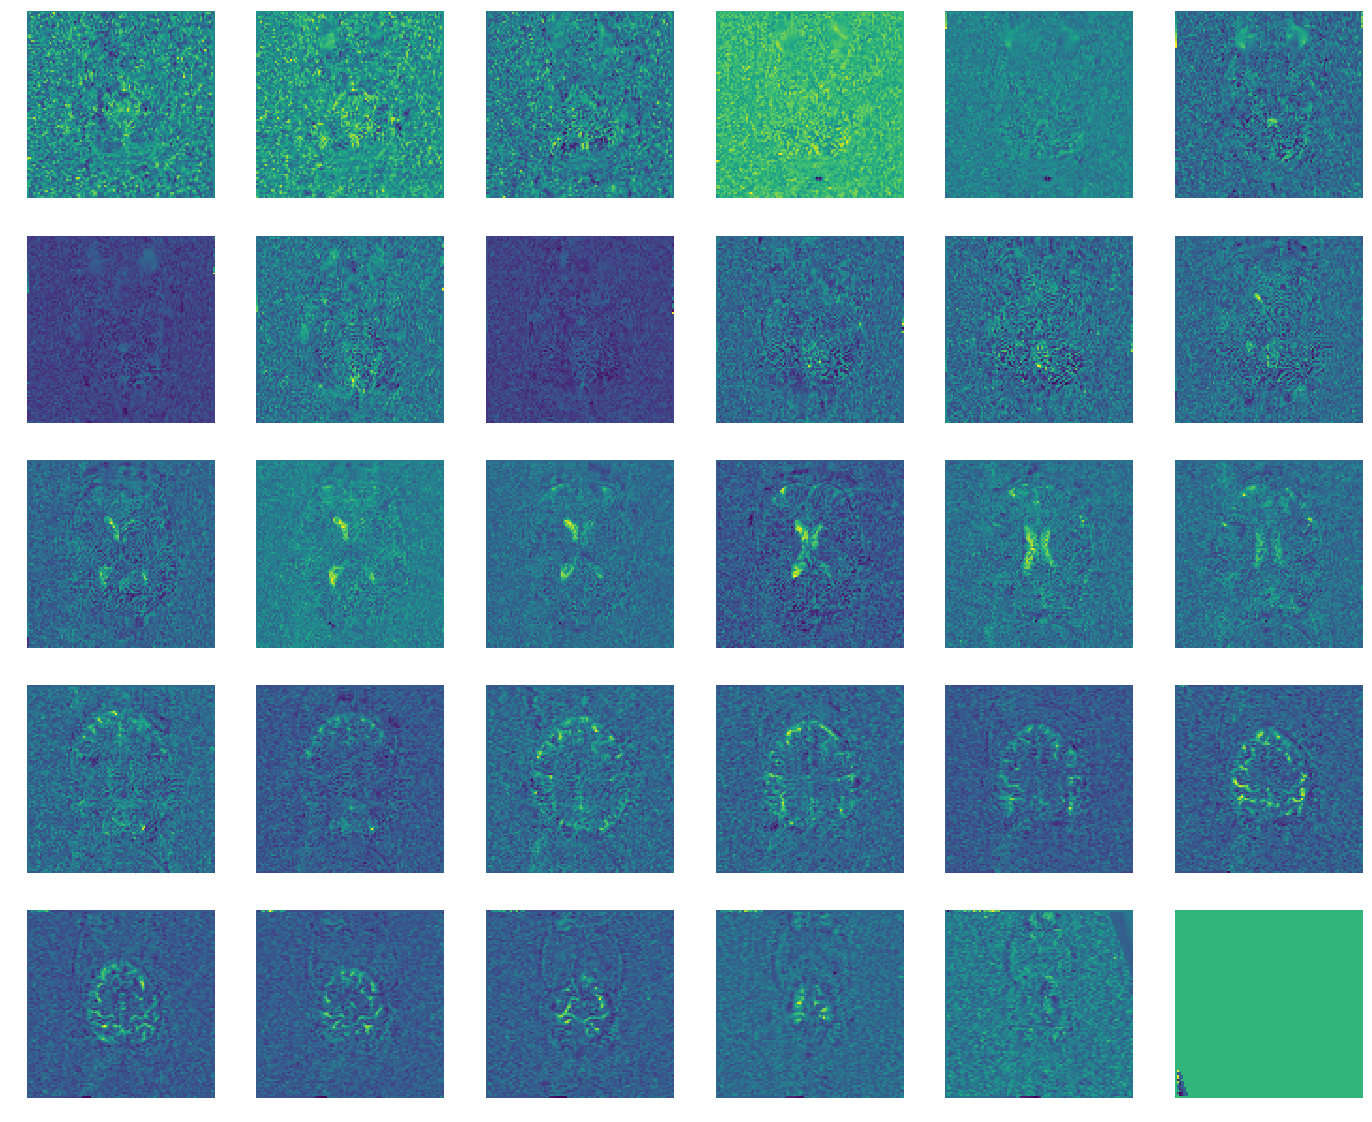

In [103]:
first_volume = motor_data[0]
fig_2d = plt.figure(figsize=(24, 20))

for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(first_volume[i])
    plt.axis('off')


**(e)** [0.5pts] Although we have made the global mean of our voxel time series to be zero and the standard deviation to be one, there are still important fluctuations across time, corresponding to the experiments we do. So if we pick out specific subsections of the time series, then the mean doesn't necessarily have to be 0. In fact, if we pick time points where we expect specific activations, we will be able to observe them.

Load the motor categories with the command below. Then make the stimulus time series for `move hand`. Use this stimulus time series as a mask to extract volumes from `motor_data`. Call those volumes `move_hand_data`. Compute the mean along the time axis of these selected volumes and again plot the resulting mean volume as an array of plots, as above. In `plt.imshow`, use `vmin=-1.5, vmax=1.5` to make every plot be on the same color scale.

In [104]:
motor_categories = np.load("/home/jovyan/motorloc_experimental_conditions.npy")

In [107]:
stimulus_move_hand = motor_categories == 'move hand'
move_hand_data = motor_data[stimulus_move_hand]
move_hand_average = move_hand_data.mean(0)

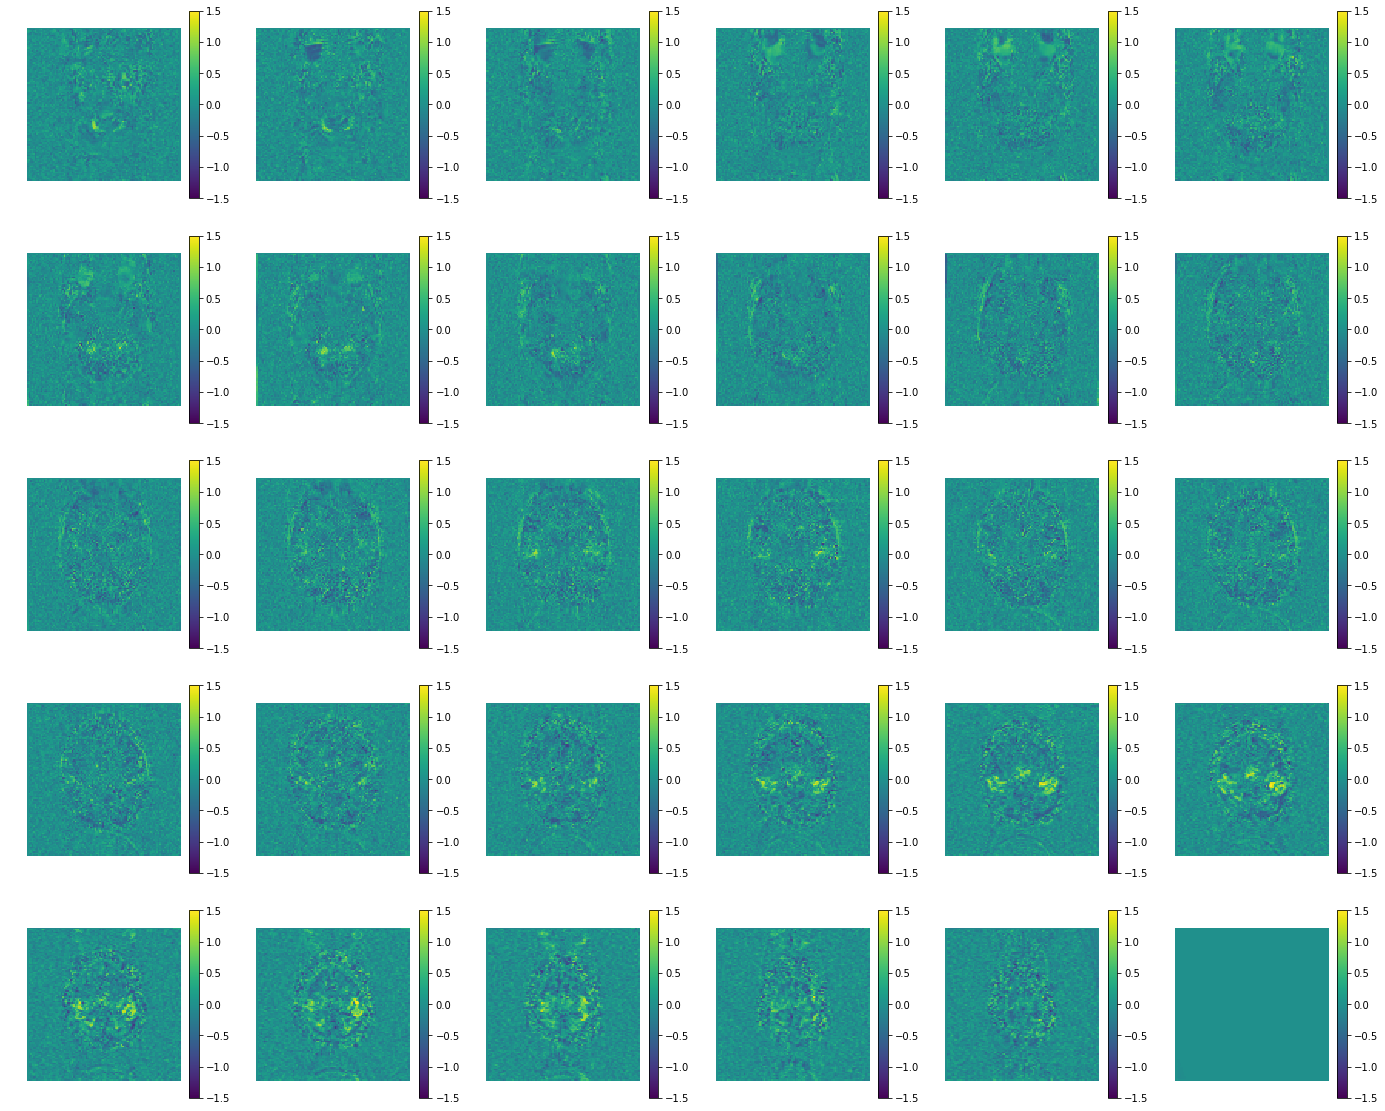

In [111]:
fig_2d = plt.figure(figsize=(24, 20))

for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(move_hand_average[i], vmin=-1.5, vmax=1.5)
    plt.axis('off')
    plt.colorbar()

**(f)** [0.5pts] Now you will plot the same exact data as a flat map to see where this hand motor activation is located. Use `cortex.Volume` to make a volume out of `move_hand_data` for subject `s01` and `catloc` transform. Optionally, make a webgl viewer to understandstand the correspondence between the activations on the slices and the activations on the flatmap.

In [120]:
vol = cortex.Volume(move_hand_average, 's01', 'catloc')

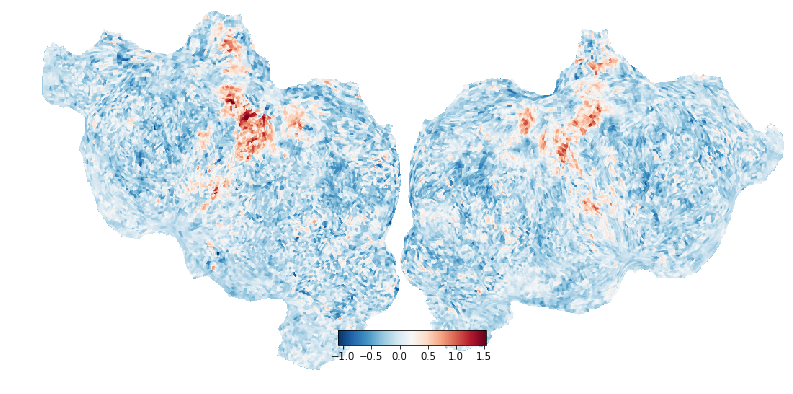

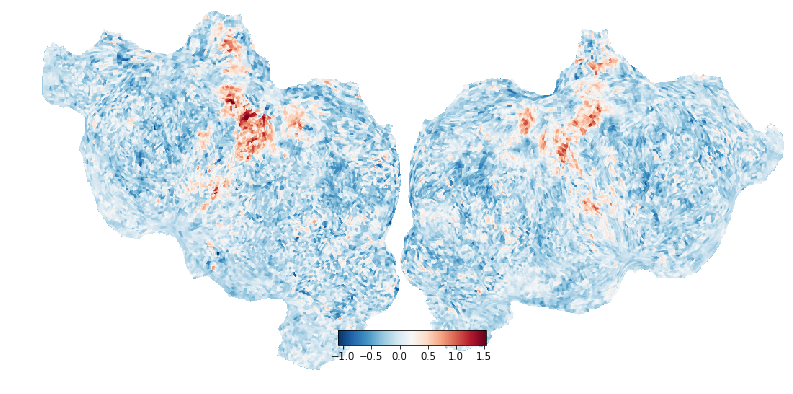

In [121]:
cortex.quickflat.make_figure(vol)

**3. Computing correlations**

In this exercise you will take another look at the mystery voxels from the previous homework and provide a more quantitative answer about which voxel came from what region by computing correlations with all response time series.

**(a)** [0.5pts] Write a function `multiply_then_add(x, y)` which computes all the pairwise products between entried of `x` and `y`, which are presume 1D arrays of equal length, and then sums up the result.

In [122]:
def multiply_then_add(x, y):
    return (x * y).sum()

**(b)** [0.5pts] Write a function `correlation(x, y)` which zscores `x` and `y`, then computes the sum of the product of the two zscored arrays and divides the result by the length of the array.

In [125]:
def correlation(x, y):
    x_z = (x - x.mean(0)) / x.std()
    y_z = (y - y.mean(0)) / y.std()
    ma = multiply_then_add(x_z, y_z)
    return ma / len(x_z)

**(c)** [0.5pts] Make two random 1D arrays `random1, random2` of the same length, compute `correlation(random1, random2)` of the two and compute `np.corrcoef(random1, random2)[1, 0]`. Check whether they are the same using `np.allclose` and store the result in `check3`

In [126]:
random1, random2 = np.random.randn(2, 100)
c1 = correlation(random1, random2)
c2 = np.corrcoef(random1, random2)[1, 0]
check3 = np.allclose(c1, c2)
print(check3)

True


**(d)** [1pt] As in last homework, make the response design matrix for all motor categories except rest, and use `plt.imshow` to visualize it.

In [128]:
hrf = create_hrf(tr=2, time_length=32, oversampling=1)

In [129]:
unique_motor_labels = np.unique(motor_categories)
unique_motor_labels_no_rest = unique_motor_labels[unique_motor_labels != 'rest']

In [134]:
stimulus_design = motor_categories.reshape(-1, 1) == unique_motor_labels
response_design = np.stack([np.convolve(stimulus_vector, hrf)[:len(stimulus_vector)] 
                            for stimulus_vector in stimulus_design.T], axis=1)

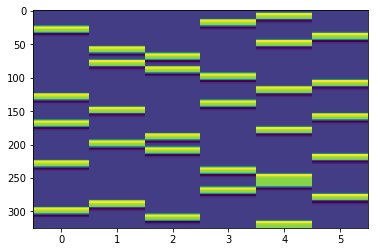

In [135]:
plt.imshow(response_design, aspect='auto')

**(e)** [1pt] Now load the mystery voxels from last homework into an array `mystery_voxels`. Then compute the correlation of every column of the motor response design with every column of mystery voxels. Arrange all these correlations in a matrix where each line indicates which column of the motor response it was and each column indicates which column of `mystery_voxels` it was. It is useful to preallocate this array as zeros. Call it `all_correlations`.

In [136]:
mystery_voxels = np.load("/home/jovyan/mystery_voxels.npy")

In [137]:
all_correlations = np.zeros((response_design.shape[1], mystery_voxels.shape[1]))
for i in range(response_design.shape[1]):
    for j in range(mystery_voxels.shape[1]):
        all_correlations[i, j] = correlation(response_design[:, i], mystery_voxels[:, j])
print(all_correlations)

[[-0.22925201 -0.05137507 -0.10534324]
 [-0.12328233 -0.22393946 -0.17913878]
 [ 0.71619804 -0.137164   -0.12507346]
 [ 0.06994148  0.73743379 -0.0833003 ]
 [-0.18048053 -0.13442563 -0.12772524]
 [-0.20325983 -0.17755418  0.63986103]]


**(f)** [0.5pts] For each column of `all_correlations` (i.e. for each mystery voxel), check which row gave the highest correlation. Check how much higher it is than every other correlation. If it is very much higher, then declare that mystery voxel as responding to the motor category responding to that row.

In [138]:
mystery_voxel1 = '...'
mystery_voxel2 = '...'
mystery_voxel3 = '...'

When you're done, don't forget to submit!

In [ ]:
_ = ok.submit()